<a href="https://colab.research.google.com/github/Surinder09/Tensorflow-specialization/blob/master/Fashion_MNIST_CNN_visulaize_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.2.0-rc3


In [0]:
load_data=tf.keras.datasets.fashion_mnist

In [0]:
(train_x,train_y),(test_x,test_y)=load_data.load_data()

In [16]:
test_x.shape

(10000, 28, 28)

In [0]:
# callback
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy')>0.93):
      print ('Training stop accuracy achieved 93%')
      self.model.stop_training = True

In [0]:
callbacks=myCallbacks()

In [0]:
# Reshape and normalise
train_x=train_x.reshape(60000, 28, 28, 1)
train_x=train_x/255.0
test_x=test_x.reshape(10000, 28, 28, 1)
test_x=test_x/255.0

In [0]:
# create model
model= tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                            tf.keras.layers.MaxPool2D((2,2)),
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                            tf.keras.layers.MaxPool2D((2,2)),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(256,activation='relu'),
                            tf.keras.layers.Dense(10,activation='softmax')])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               409856    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
# Compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(x=train_x, y=train_y,callbacks=[callbacks],batch_size=16,epochs=10)

Epoch 1/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.4074 - accuracy: 0.8511
Epoch 2/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.2769 - accuracy: 0.8974
Epoch 3/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.2339 - accuracy: 0.9113
Epoch 4/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1985 - accuracy: 0.9259
Epoch 5/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1719 - accuracy: 0.9345


In [24]:
model.evaluate(test_x,test_y) # 90% accuracy achieved

313/313 [==============================] - 1s 4ms/step - loss: 0.2719 - accuracy: 0.9070


[0.27193424105644226, 0.9070000052452087]

In [0]:
import random

In [0]:
activation=tf.keras.models.Model(inputs= model.input,outputs =model.layers[0].output)
f1=activation.predict(test_x[1].reshape(1,28,28,1))

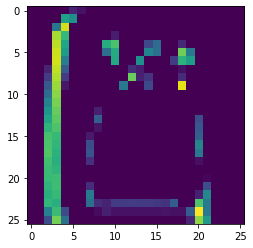

In [26]:
plt.imshow(f1[0,:,:,1])

In [27]:
# Visulaizing output of CNN layers
test_y[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [28]:
# Now we will visualize output of our image data across different Conv and maxpool layers
for layer in model.layers:
  print(layer.output)

Tensor("conv2d_2/Identity:0", shape=(None, 26, 26, 64), dtype=float32)
Tensor("max_pooling2d_2/Identity:0", shape=(None, 13, 13, 64), dtype=float32)
Tensor("conv2d_3/Identity:0", shape=(None, 11, 11, 64), dtype=float32)
Tensor("max_pooling2d_3/Identity:0", shape=(None, 5, 5, 64), dtype=float32)
Tensor("flatten_1/Identity:0", shape=(None, 1600), dtype=float32)
Tensor("dense_2/Identity:0", shape=(None, 256), dtype=float32)
Tensor("dense_3/Identity:0", shape=(None, 10), dtype=float32)


In [29]:
print(model.input) # prints the input infromation

Tensor("conv2d_2_input:0", shape=(None, 28, 28, 1), dtype=float32)


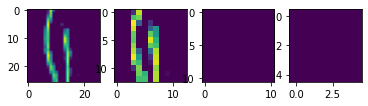

In [35]:
fig,ax=plt.subplots(1,4)
random_image = random.choice(range(1,10000)) # choose random image from test data
conv_no = 1                                  # choose the first filter
layers_output=[]                             
for layer in model.layers:                   # model consist of different across network iterate through layers 
  layers_output.append(layer.output)         # store layer information in a list
actiavtion_model=tf.keras.models.Model(inputs=model.input,outputs=layers_output)  # tf.keras as module 'models' which take input and pass across different layers
# plotting the image
for i in range(4):
  f1=actiavtion_model.predict(test_x[random_image].reshape(1,28,28,1))[i] # predict across each layer
  ax[i].imshow(f1[0,:,:,conv_no])                                         # plot the image at covolution 1 at different layers